<a href="https://colab.research.google.com/github/cgatanid/Reporte-Resoluciones/blob/main/DATOS_RESOLUCIONES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

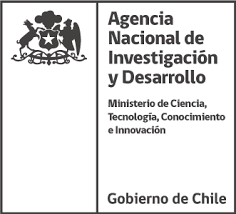

# Reporte de Resoluciones
---

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!pip install xlsxwriter --quiet
!pip install sidetable --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import xlsxwriter
import sidetable as stb
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/gdrive/MyDrive/INSUMOS/Reporte_Resoluciones.xlsx", parse_dates=["Fecha_Cierre", "INICIO_BECA", "FIN_BECA"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56019 entries, 0 to 56018
Columns: 281 entries, FOLIO to BECA_ESTADO
dtypes: float64(31), int64(2), object(248)
memory usage: 120.1+ MB


In [ ]:
df['FIN_BECA'] = pd.to_datetime(df['FIN_BECA'], errors='coerce')
df['INICIO_BECA'] = pd.to_datetime(df['INICIO_BECA'], errors='coerce')
df["Fecha_Cierre"] = pd.to_datetime(df["Fecha_Cierre"], errors='coerce')

In [ ]:
# Estandarizando tipo de programa
df['TIPO_PROGRAMA (EST)'] = ["DOCTORADO" if "DOCTORADO" in str(i) else "MAGISTER" if "MPE" in str(i) else "MAGISTER" if "MAGISTER" in str(i) else "MAGISTER" if "MAGÍSTER" in str(i) else "POSDOCTORADO" if "POSDOCTORADO" in str(i) else "OTRO" for i in df["TIPO_PROGRAMA"]]

In [ ]:
# Estandarizando tipo de beca
df["TIPO_BECA (EST)"] = ["BECAS CHILE" if "BECAS CHILE" in str(i) else "CONICYT" if "CONICYT" in str(i) else "OTRO" for i in df["TIPO_BECA"]]

In [ ]:
df.stb.missing()

,missing,total,percent
INVALIDA,56019,56019,100.0
FRENU_BEN_SALUD,56019,56019,100.0
Fecha_Cierre,56019,56019,100.0
AUT_ACTV_REMUNE,56019,56019,100.0
INICIO_BECA,56019,56019,100.0
...,...,...,...
NOMBRE,0,56019,0.0
TIPO_BECA,0,56019,0.0
AÑO,0,56019,0.0
ESTADO,0,56019,0.0


## BRECHAS: Analisis desde el año 2008 (datos brutos)
---

In [ ]:
df["TIPO_PROGRAMA"] = df["TIPO_PROGRAMA"].fillna("-").astype(str)
df = df[df["TIPO_PROGRAMA"].str.contains("ESTADÍAS|PSANTÍA DAAD|diplomado|cotutela|pasantía|pasantia|eventos|cursos|asistencia|apoyo|tesis",case=False) == False] # Para sacar los BBCC, entre otros.
df["TIPO_PROGRAMA"].unique()

array(['DOCTORADO', 'MAGISTER', 'MPE', 'DOCTORADO LATINOAMERICANO',
       'MAGISTER EXTRANJERO', 'ESPECIALIZACION',
       'DOCTORADO PARA EXTRANJEROS', 'SUBESPECIALIDADES MEDICAS',
       'DOCTORADO EXTRANJERO BECAS BICENTENARIO', 'DOCTORADO DEA',
       'DOCTORADO FULBRIGHT', 'SOCIEDADES CIENTIFICAS', 'POSTDOCTORADO',
       'MAGISTER COMPLEMENTARIO', 'DOCTORADO EXTRANJERO',
       'MAGISTER SECTOR PUBLICO', 'DOCTORADO FULBRIGHT BIO',
       'DOCTORADO EXTRANJERO EN EDUCACION',
       'DOCTORADO ACUERDO BILATERAL DAAD', 'DOCTORADO INRIA', '-',
       'DOCTORADO EXT BPR', 'MAGISTER P/P S.DISCAPACIDAD',
       'MAGISTER AREAS PRIORITARIAS', 'DOCTORADO DAAD',
       'MAGISTER BPR EXT', 'DOCTORADO GESTION PROPIA', 'DOCTORADO BID',
       'MAGISTER FIC', 'DOCTORADO FIC ', 'DOCTORADO CAMBRIDGE',
       'DOCTORADO TDRT', 'DOCTORADO UNIV. VICTORIA NUEVA ZELANDA',
       'DOCTORADO ACUERDO BILATERAL', 'MAGISTER/DOCTORADO',
       'MAGISTER EXTRANJERO EN EDUCACION', 'DOCTORADO UNIVERSIDAD AAR

In [ ]:
pd.set_option("display.max_rows", len(df))

df_filtered = df[df["AÑO"] > 2007]

# Convertir la columna 'AÑO' a cadena de texto
df_filtered['AÑO'] = df_filtered['AÑO'].astype(str) # No dejaba usar stb.subtotal() porque el año era int

result = df_filtered.groupby(["AÑO", "SEXO", "TIPO_BECA", "TIPO_PROGRAMA"])["FOLIO"].count().unstack(1).fillna(0).stb.subtotal(sub_level=[1])
result = result.applymap('{:.0f}'.format)

result

<ipython-input-13-f3bc109f2046>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AÑO'] = df_filtered['AÑO'].astype(str) # No dejaba usar stb.subtotal() porque el año era int


SEXO                                                                            FEMENINO  \
AÑO         TIPO_BECA             TIPO_PROGRAMA                                            
2008        BECAS CHILE           DOCTORADO                                          358   
                                  MAGISTER                                          1569   
                                  MPE                                                 89   
                                  POSTDOCTORADO                                       16   
            BPR INTERNACIONAL     DOCTORADO                                           20   
                                  DOCTORADO EXT BPR                                   42   
                                  ESPECIALIDAD                                         0   
                                  ESPECIALIZACION                                      6   
                                  MAGISTER                                            27   
                                  MAGISTER BPR EXT                                     3   
                                  POSTDOCTORADO                                        1   
            BPR NACIONAL          DOCTORADO                                            0   
                                  MAGISTER                                           126   
                                  MAGISTER/DOCTORADO                                   0   
            CONICYT               DOCTORADO                                          199   
                                  DOCTORADO LATINOAMERICANO                           21   
                                  DOCTORADO PARA EXTRANJEROS                          11   
                                  MAGISTER                                            35   
                                  MPE                                                 26   
            CONICYT INTERNACIONAL DOCTORADO                                            1   
                                  DOCTORADO CAMBRIDGE                                  1   
                                  DOCTORADO DAAD                                       4   
                                  DOCTORADO DEA                                       16   
                                  DOCTORADO EXTRANJERO                                56   
                                  DOCTORADO EXTRANJERO EN EDUCACION                   11   
                                  DOCTORADO FULBRIGHT                                 19   
                                  DOCTORADO FULBRIGHT BIO                             49   
                                  DOCTORADO GESTION PROPIA                             1   
                                  DOCTORADO INRIA                                      1   
                                  DOCTORADO UNIV. MELBOURNE AUSTRALIA                  2   
                                  DOCTORADO UNIV. QUEENSLAND AUSTRALIA                 1   
                                  DOCTORADO UNIV. VICTORIA NUEVA ZELANDA               3   
                                  DOCTORADO UNIVERSIDAD WAGENINGEN HOLANDA             2   
                                  MAGISTER EN EL EXTRANJERO POR GESTIÓN PROPIA         1   
                                  MAGISTER EXTRANJERO                                 13   
                                  MAGISTER EXTRANJERO EN EDUCACION                     4   
                                  MPE                                                  1   
                                  PROFUNDIZACION                                       0   
            2008 - subtotal                                                         2735   
2009        BECAS CHILE           DOCTORADO                                          436   
                                  MAGISTER                                          2023   
                                  MPE       

## Porcentajes incorporados
---

In [ ]:
pd.set_option("display.max_rows", len(df))
result = result.astype(int)
#Operaciones matemáticas con columnas
result["TOTAL"] = result["MASCULINO"] + result["FEMENINO"]
result["FEMENINO (%)"] = result["FEMENINO"]/result["TOTAL"]*100
result["MASCULINO (%)"] = result["MASCULINO"]/result["TOTAL"]*100
result["FEMENINO (%)"] = result["FEMENINO (%)"].map('{:,.2f}%'.format)
result["MASCULINO (%)"] = result["MASCULINO (%)"].map('{:,.2f}%'.format)
result["TOTAL (%)"] = result["MASCULINO"]/result["TOTAL"]*100 + result["FEMENINO"]/result["TOTAL"]*100
result["TOTAL (%)"] = result["TOTAL (%)"].map('{:,.2f}%'.format)
result

SEXO                                                                             FEMENINO  \
AÑO         TIPO_BECA             TIPO_PROGRAMA                                             
2008        BECAS CHILE           DOCTORADO                                           358   
                                  MAGISTER                                           1569   
                                  MPE                                                  89   
                                  POSTDOCTORADO                                        16   
            BPR INTERNACIONAL     DOCTORADO                                            20   
                                  DOCTORADO EXT BPR                                    42   
                                  ESPECIALIDAD                                          0   
                                  ESPECIALIZACION                                       6   
                                  MAGISTER                                             27   
                                  MAGISTER BPR EXT                                      3   
                                  POSTDOCTORADO                                         1   
            BPR NACIONAL          DOCTORADO                                             0   
                                  MAGISTER                                            126   
                                  MAGISTER/DOCTORADO                                    0   
            CONICYT               DOCTORADO                                           199   
                                  DOCTORADO LATINOAMERICANO                            21   
                                  DOCTORADO PARA EXTRANJEROS                           11   
                                  MAGISTER                                             35   
                                  MPE                                                  26   
            CONICYT INTERNACIONAL DOCTORADO                                             1   
                                  DOCTORADO CAMBRIDGE                                   1   
                                  DOCTORADO DAAD                                        4   
                                  DOCTORADO DEA                                        16   
                                  DOCTORADO EXTRANJERO                                 56   
                                  DOCTORADO EXTRANJERO EN EDUCACION                    11   
                                  DOCTORADO FULBRIGHT                                  19   
                                  DOCTORADO FULBRIGHT BIO                              49   
                                  DOCTORADO GESTION PROPIA                              1   
                                  DOCTORADO INRIA                                       1   
                                  DOCTORADO UNIV. MELBOURNE AUSTRALIA                   2   
                                  DOCTORADO UNIV. QUEENSLAND AUSTRALIA                  1   
                                  DOCTORADO UNIV. VICTORIA NUEVA ZELANDA                3   
                                  DOCTORADO UNIVERSIDAD WAGENINGEN HOLANDA              2   
                                  MAGISTER EN EL EXTRANJERO POR GESTIÓN PROPIA          1   
                                  MAGISTER EXTRANJERO                                  13   
                                  MAGISTER EXTRANJERO EN EDUCACION                      4   
                                  MPE                                                   1   
                                  PROFUNDIZACION                                        0   
            2008 - subtotal                                                          2735   
2009        BECAS CHILE           DOCTORADO                                           436   
                                  MAGISTER                                           2023   
 

In [ ]:
pd.set_option("display.max_rows", len(df))
#result = result.astype(int)
#Operaciones matemáticas con columnas
result["TOTAL"] = result["MASCULINO"] + result["FEMENINO"]
result["FEMENINO (%)"] = result["FEMENINO"]/result["TOTAL"]*100
result["MASCULINO (%)"] = result["MASCULINO"]/result["TOTAL"]*100
result["TOTAL (%)"] = result["MASCULINO"]/result["TOTAL"]*100 + result["FEMENINO"]/result["TOTAL"]*100
result["TOTAL (%)"] = result["TOTAL (%)"]

format_columns0 = ['FEMENINO (%)', 'MASCULINO (%)']
format_columns1 = ['FEMENINO (%)', 'MASCULINO (%)', "TOTAL (%)" ]
result.style.background_gradient(cmap='YlOrRd', subset=format_columns0).format("{:.2f}%", subset=pd.IndexSlice[:, format_columns1])

## Datos estandarizados TIPO_BECA (EST) y 'TIPO_PROGRAMA (EST)'
---

In [ ]:
pd.set_option("display.max_rows", len(df))

df_filtered = df[df["AÑO"] > 2007]

# Convertir la columna 'AÑO' a cadena de texto
df_filtered['AÑO'] = df_filtered['AÑO'].astype(str)

result2 = df_filtered.groupby(["AÑO", "SEXO", "TIPO_BECA (EST)", 'TIPO_PROGRAMA (EST)']).agg({"FOLIO":'count'}).unstack(1).unstack(2).fillna(0).astype(int).stb.subtotal(sub_level=[1])

result2

<ipython-input-16-da1d751c406e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AÑO'] = df_filtered['AÑO'].astype(str)


FOLIO                                      
SEXO                         FEMENINO               MASCULINO              
TIPO_PROGRAMA (EST)         DOCTORADO MAGISTER OTRO DOCTORADO MAGISTER OTRO
AÑO         TIPO_BECA (EST)                                                
2008        BECAS CHILE           374     1658    0       579     1695    0
            CONICYT               398       80    0       571       83    2
            OTRO                   63      156    6        73      128   16
            2008 - subtotal       835     1894    6      1223     1906   18
2009        BECAS CHILE           460     2174   25       787     2223   49
            CONICYT               380       83    2       449       70    4
            OTRO                    1       89    0         1       57    0
            2009 - subtotal       841     2346   27      1237     2350   53
2010        BECAS CHILE           178      171   25       278      158   45
            CONICYT               250      210    0       356      159    0
            OTRO                    0        0    0         1        0    2
            2010 - subtotal       428      381   25       635      317   47
2011        BECAS CHILE           182      649    3       286      573    9
            CONICYT               284      212  191       322      201  227
            OTRO                    1        0    0         0        0    0
            2011 - subtotal       467      861  194       608      774  236
2012        BECAS CHILE           234      741    7       338      789   23
            CONICYT               294      357    0       315      283    0
            2012 - subtotal       528     1098    7       653     1072   23
2013        BECAS CHILE           185      244    2       249      263    7
            CONICYT               266      370    0       347      428    0
            2013 - subtotal       451      614    2       596      691    7
2014        BECAS CHILE           171      253    3       261      229    6
            CONICYT               306      220    0       364      238    0
            2014 - subtotal       477      473    3       625      467    6
2015        BECAS CHILE           174      213    1       277      190   11
            CONICYT               241      135    1       393      171    0
            2015 - subtotal       415      348    2       670      361   11
2016        BECAS CHILE           167      215    2       295      178    8
            CONICYT               264      143    0       340      161    0
            2016 - subtotal       431      358    2       635      339    8
2017        BECAS CHILE           167      239    4       288      176   14
            CONICYT               315      173    0       421      188    0
            2017 - subtotal       482      412    4       709      364   14
2018        BECAS CHILE           202      200    7       259      218   10
            CONICYT               310      182    0       424      178    0
            2018 - subtotal       512      382    7       683      396   10
2019        BECAS CHILE           174      224    5       248      189   13
            CONICYT               317      182    0       420      180    0
            2019 - subtotal       491      406    5       668      369   13
2020        BECAS CHILE           164        0    0       226        0    0
            CONICYT               368      186    0       485      175    0
            2020 - subtotal       532      186    0       711      175    0
2021        BECAS CHILE            19        0    0        23        0    0
            CONICYT               461      161    0       635      179    0
            2021 - subtotal       480      161    0       658      179    0
2022        BECAS CHILE           165      137    0       158       99    0
            CONICYT               406      176    0       497      195    0
            2022 - subtotal       571      313    0       655      294    0
2023

DOCTORADO
---

In [ ]:
pd.set_option("display.max_rows", len(df))

df_filtered = df[(df["AÑO"] > 2007) & (df["TIPO_PROGRAMA (EST)"] == "DOCTORADO")]

# Convertir la columna 'AÑO' a cadena de texto
df_filtered['AÑO'] = df_filtered['AÑO'].astype(str)

result2_doc = df_filtered.groupby(["AÑO", "SEXO", "TIPO_BECA (EST)", 'TIPO_PROGRAMA (EST)']).agg({"FOLIO":'count'}).unstack(3).unstack(1).fillna(0).astype(int).stb.subtotal()

# Cálculos
result2_doc[('FOLIO', 'DOCTORADO',  'TOTAL')]  = result2_doc[('FOLIO', 'DOCTORADO',  'FEMENINO')] + result2_doc[('FOLIO', 'DOCTORADO',  'MASCULINO')]
result2_doc[('FOLIO', 'DOCTORADO',  'FEMENINO (%)')]  = result2_doc[('FOLIO', 'DOCTORADO',  'FEMENINO')] / result2_doc[('FOLIO', 'DOCTORADO',  'TOTAL')] *100
result2_doc[('FOLIO', 'DOCTORADO',  'MASCULINO (%)')]  = result2_doc[('FOLIO', 'DOCTORADO',  'MASCULINO')] / result2_doc[('FOLIO', 'DOCTORADO', 'TOTAL')] *100
result2_doc[('FOLIO', 'DOCTORADO',  'TOTAL (%)')]  = (result2_doc[('FOLIO', 'DOCTORADO',  'MASCULINO')] + result2_doc[('FOLIO', 'DOCTORADO',  'FEMENINO')] ) / result2_doc[('FOLIO', 'DOCTORADO', 'TOTAL')] *100

format_columns0 = [('FOLIO', 'DOCTORADO',  'FEMENINO (%)'), ('FOLIO', 'DOCTORADO',  'MASCULINO (%)')]
format_columns1 = [('FOLIO', 'DOCTORADO',  'FEMENINO (%)'), ('FOLIO', 'DOCTORADO',  'MASCULINO (%)'), ('FOLIO', 'DOCTORADO',  'TOTAL (%)')]

result2_doc.style.background_gradient(cmap='YlOrRd', subset=format_columns0).format("{:.2f}%", subset=pd.IndexSlice[:, format_columns1])

<ipython-input-17-645046636be1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AÑO'] = df_filtered['AÑO'].astype(str)


In [ ]:
result2_doc.columns

MultiIndex([('FOLIO', 'DOCTORADO',      'FEMENINO'),
            ('FOLIO', 'DOCTORADO',     'MASCULINO'),
            ('FOLIO', 'DOCTORADO',         'TOTAL'),
            ('FOLIO', 'DOCTORADO',  'FEMENINO (%)'),
            ('FOLIO', 'DOCTORADO', 'MASCULINO (%)'),
            ('FOLIO', 'DOCTORADO',     'TOTAL (%)')],
           names=[None, 'TIPO_PROGRAMA (EST)', 'SEXO'])

MAGISTER
---

In [ ]:
pd.set_option("display.max_rows", len(df))

df_filtered = df[(df["AÑO"] > 2007) & (df["TIPO_PROGRAMA (EST)"] == "MAGISTER")]

# Convertir la columna 'AÑO' a cadena de texto
df_filtered['AÑO'] = df_filtered['AÑO'].astype(str)

result2_mag = df_filtered.groupby(["AÑO", "SEXO", "TIPO_BECA (EST)", 'TIPO_PROGRAMA (EST)']).agg({"FOLIO":'count'}).unstack(3).unstack(1).fillna(0).astype(int).stb.subtotal()

# Cálculos

result2_mag[('FOLIO', 'MAGISTER',  'TOTAL')]  = result2_mag[('FOLIO', 'MAGISTER',  'FEMENINO')] + result2_mag[('FOLIO', 'MAGISTER',  'MASCULINO')]
result2_mag[('FOLIO', 'MAGISTER',  'FEMENINO (%)')]  = result2_mag[('FOLIO', 'MAGISTER',  'FEMENINO')] / result2_mag[('FOLIO', 'MAGISTER',  'TOTAL')] *100
result2_mag[('FOLIO', 'MAGISTER',  'MASCULINO (%)')]  = result2_mag[('FOLIO', 'MAGISTER',  'MASCULINO')] / result2_mag[('FOLIO', 'MAGISTER', 'TOTAL')] *100
result2_mag[('FOLIO', 'MAGISTER',  'TOTAL (%)')]  = (result2_mag[('FOLIO', 'MAGISTER',  'MASCULINO')] + result2_mag[('FOLIO', 'MAGISTER',  'FEMENINO')] ) / result2_mag[('FOLIO', 'MAGISTER', 'TOTAL')] *100

format_columns0 = [('FOLIO', 'MAGISTER',  'FEMENINO (%)'), ('FOLIO', 'MAGISTER',  'MASCULINO (%)')]
format_columns1 = [('FOLIO', 'MAGISTER',  'FEMENINO (%)'), ('FOLIO', 'MAGISTER',  'MASCULINO (%)'), ('FOLIO', 'MAGISTER',  'TOTAL (%)')]
result2_mag.style.background_gradient(cmap='YlOrRd', subset=format_columns0).format("{:.2f}%", subset=pd.IndexSlice[:, format_columns1])

<ipython-input-19-a8f09339634d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AÑO'] = df_filtered['AÑO'].astype(str)


OTROS
---

In [ ]:
pd.set_option("display.max_rows", len(df))

df_filtered = df[(df["AÑO"] > 2007) & (df["TIPO_PROGRAMA (EST)"] == "OTRO")]

# Convertir la columna 'AÑO' a cadena de texto
df_filtered['AÑO'] = df_filtered['AÑO'].astype(str)

result2_otro = df_filtered.groupby(["AÑO", "SEXO", "TIPO_BECA (EST)", 'TIPO_PROGRAMA (EST)']).agg({"FOLIO":'count'}).unstack(3).unstack(1).fillna(0).astype(int).stb.subtotal()

result2_otro[('FOLIO', 'OTRO',  'TOTAL')]  = result2_otro[('FOLIO', 'OTRO',  'FEMENINO')] + result2_otro[('FOLIO', 'OTRO',  'MASCULINO')]
result2_otro[('FOLIO', 'OTRO',  'FEMENINO (%)')]  = result2_otro[('FOLIO', 'OTRO',  'FEMENINO')] / result2_otro[('FOLIO', 'OTRO',  'TOTAL')] *100
result2_otro[('FOLIO', 'OTRO',  'MASCULINO (%)')]  = result2_otro[('FOLIO', 'OTRO',  'MASCULINO')] / result2_otro[('FOLIO', 'OTRO', 'TOTAL')] *100
result2_otro[('FOLIO', 'OTRO',  'TOTAL (%)')]  = (result2_otro[('FOLIO', 'OTRO',  'MASCULINO')] + result2_otro[('FOLIO', 'OTRO',  'FEMENINO')] ) / result2_otro[('FOLIO', 'OTRO', 'TOTAL')] *100


format_columns0 = [('FOLIO', 'OTRO',  'FEMENINO (%)'), ('FOLIO', 'OTRO',  'MASCULINO (%)')]
format_columns1 = [('FOLIO', 'OTRO',  'FEMENINO (%)'), ('FOLIO', 'OTRO',  'MASCULINO (%)'), ('FOLIO', 'OTRO',  'TOTAL (%)')]
result2_otro.style.background_gradient(cmap='YlOrRd', subset=format_columns0).format("{:.2f}%", subset=pd.IndexSlice[:, format_columns1])

<ipython-input-20-58f091701016>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AÑO'] = df_filtered['AÑO'].astype(str)


In [ ]:
writer = pd.ExcelWriter('/gdrive/MyDrive/PRODUCTOS/EXCEL.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='DF')
df_filtered.to_excel(writer, sheet_name='DF (2008- actualidad)')
result.to_excel(writer, sheet_name='result')
result2.to_excel(writer, sheet_name='result2')
result2_doc.to_excel(writer, sheet_name='result2_doc')
result2_mag.to_excel(writer, sheet_name='result2_mag')
result2_otro.to_excel(writer, sheet_name='result2_otro')
writer.close()

In [ ]:
from google.colab import files
files.download('/gdrive/MyDrive/PRODUCTOS/EXCEL.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>